# Analyzing Key Factors that Contribute to College Dropout Rate

## By Nelly Morales

## Digital Humanities 140 - Coding for Humanities

## August 2, 2024

### Introduction

In universities and colleges throughout the world, student enrollment has increased drastically over time, as secondary institutions and mass media encourage students to acquire higher education to benefit themselves and their career. Although numbers in enrollment have increased, so have the dropout rates in these same institutions. However, researchers have strived to prevent a student’s likelihood of dropping out of college and increase their potential academic success. They do so by looking at various factors in their lives such as their parent’s education level and occupation, any disability they may have, and their home environment. 

The dataset that I have chosen explores these kinds of variables. The dataset was retrieved from the UC Irvine Machine Learning Repository, and was created by Valentim Realinho, Mónica Vieira Martins, Jorge Machado, and Luís Baptista. The data was collected from students going to college in the country of Portugal. The dataset includes information about the student’s demographics, socioeconomic status, and marital status, to name a few. Variables were measured in a variety of ways, such as numbers that indicated varying nationalities or levels of education and numbers 1 and 0 that indicated whether the student was married or not.

My motivation from the data comes from a place of relatability. I would like to know more about the factors that increase the likelihood of college students dropping out as I am currently one at the time of creating this project. The question that I am seeking to answer is: Which factors are most predictive of a student’s likelihood to drop out? My hypothesis is that financial constraints may be a substantial factor in why students dropout of college.

Link to data: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

### Methods

As mentioned previously, the data that was collected, analyzed and stored into the dataset that I used for this project came from a student population in the country of Portugal. As in every case, there can be missing data. One important thing to note is that this data provides limitations, as the data collection only considers college students from one country, Portugal, and does not include other countries such as the United States or Canada. This data may or may not accurately represent the factors influencing college drop-out rates and academic success for every college student population. As a result, it is important to not assume a general stance based on this data, but rather a collective understanding of what motivates students to achieve different paths.

Moving forward, the sample that the researchers and data analysts provided come from a handful of college students residing in Portgual. Here, researchers collected data from students studying various academic disciplines and fields, such as nursing, journalism and management. It is also important to note that the researchers recorded the demographic of the participants, storing information such as age, gender, and marital status in their dataset. They decided to do so in order to know what the student’s current information was during the time of enrollment and how this contributed to their performance in their individual classes. The total number of participants the researchers found was 4424 students, and there are 36 variables, or features, that they recorded. The kind of data the variables contain are integer, categorical and real data. After the semester was over in the time that the researchers were doing the study, the participants were organized into three categories: dropout, enrolled, and graduate. The purpose of this study was to find ways to reduce the number of students failing or dropping out of higher education. In doing this, the researchers can predict which students are at high risk of the aforementioned actions, and be able to support them.

I will be analyzing this dataset through the programming language Python, which is used in my Jupyter notebook. I will first observe and clean the data, if necessary, to ensure that the data is being correctly analyzed with its intended purpose. Then, I hope to create data visualizations that explore the demographics of the student population. I also plan to create other data visualizations that analyze any key factors that may contribute to a student’s likelihood of dropping out. Lastly, I will summarize the results I find through this analysis and provide insight as to why this dataset is useful for future students and research. 

### Results

The following visualizations are an exploration of the dataset. Here, I lay out a few key variables that showcase the demographics of the population, as well as an overview of what the variables are and how they were recorded for each individual student.

#### Exploratory Data Analysis

In [176]:
# Import every package needed

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## pip install ucimlrepo in TERMINAL

## Code obtained from website starts here
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 

## Code obtained from website ends here

# Create a copy of the DataFrame
X_copy = X.copy()

y_copy = y.copy()

df_col_merged = pd.concat([X, y], axis=1)
df_col_merged.head()

## The target variable, which consists of the status of each student in terms of 
## enrollment, dropout or graduated, was separated from the main dataframe,
## so I had to merge them to get a total of 37 columns.

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


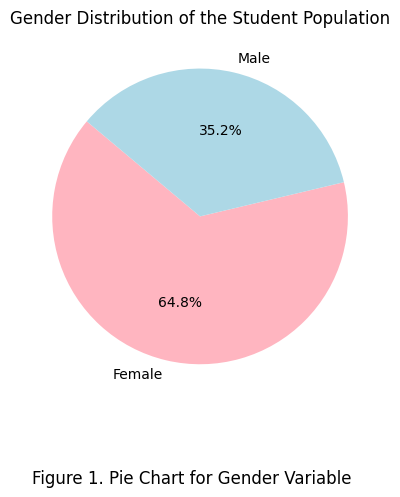

In [154]:
## Pie chart for Gender variable
X_copy = X.copy()

# Changing the numbers from 0 to Female and 1 to Male
gender_counts = X_copy['Gender'].map({0: 'Female', 1: 'Male'}).value_counts()

# Assigning colors for genders
coloring = {'Female': '#FFB5C0', 'Male': '#ADD8E6'}

# Plotting the pie chart
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=[coloring[label] for label in gender_counts.index]
)
plt.title('Gender Distribution of the Student Population')
plt.figtext(0.5, -0.05, 'Figure 1. Pie Chart for Gender Variable', ha='center', va='center', fontsize=12, color='black')
plt.show()

In the pie chart above (Figure 1), we can see that the majority of the population from this dataset are those who identify as females. Approximately 64.8% of students from this dataset are females, and 35.2% of students are males. From this, we can possibly identify any relationships available that link gender with dropout rate, if any.

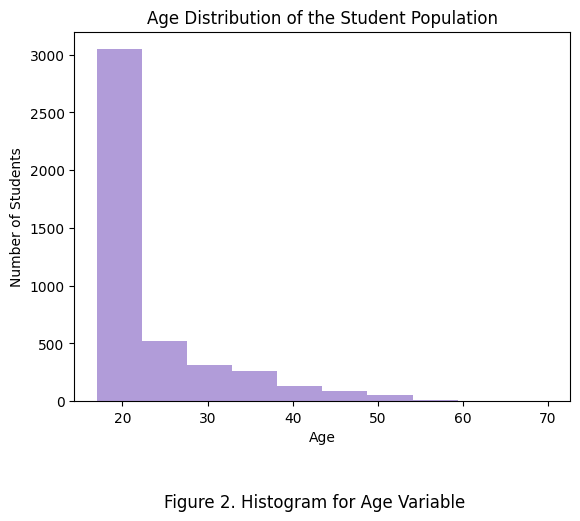

In [155]:
## Histogram for Age variable
plt.hist(X_copy['Age at enrollment'], bins=10, color='#B19CD9')
plt.title('Age Distribution of the Student Population')
plt.xlabel('Age')
plt.ylabel('Number of Students')

plt.figtext(0.5, -0.1, 'Figure 2. Histogram for Age Variable', ha='center', va='center', fontsize=12, color='black')

plt.show()

This histogram (Figure 2) shows that the majority of students in the dataset are in their early 20s, with the distribution heavily skewed to the right as age increases. Specifically, approximately 3,000 students are in their early 20s, 500 are in their mid-20s, and there are more than 500 students aged 30 and up. The distribution of age may be used to determine the factors indicating student drop-out rate by identifying which age group is most at risk for dropping out.

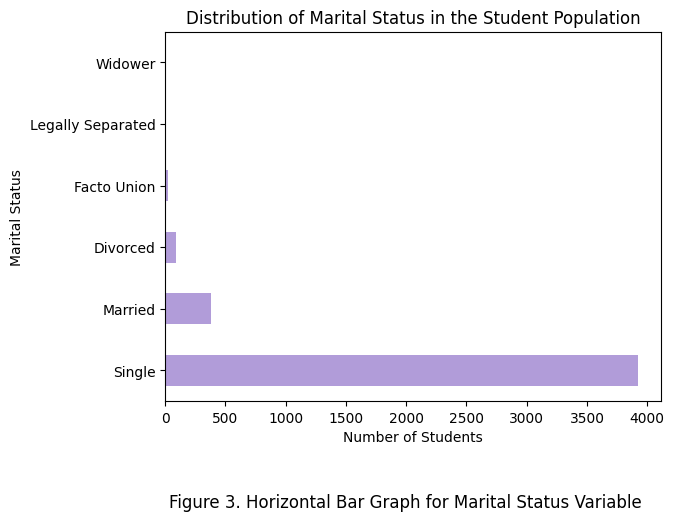

In [177]:
## Horizontal bar graph for Marital Status variable
marital_status_mapping = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto Union',
    6: 'Legally Separated'
}

X_copy['Marital Status'] = X_copy['Marital Status'].map(marital_status_mapping)

marital_status_counts = X_copy['Marital Status'].value_counts()

# Plotting the horizontal bar graph
marital_status_counts.plot(kind='barh', color='#B19CD9')
plt.title('Distribution of Marital Status in the Student Population')
plt.xlabel('Number of Students')
plt.ylabel('Marital Status')

plt.figtext(0.5, -0.1, 'Figure 3. Horizontal Bar Graph for Marital Status Variable', ha='center', va='center', fontsize=12, color='black')

plt.show()

As we can see in the horizontal bar graph above (Figure 3), a majority of these students in the dataset are single. A handful are married or divorced, and very few, if any, are legally separated or a widower.

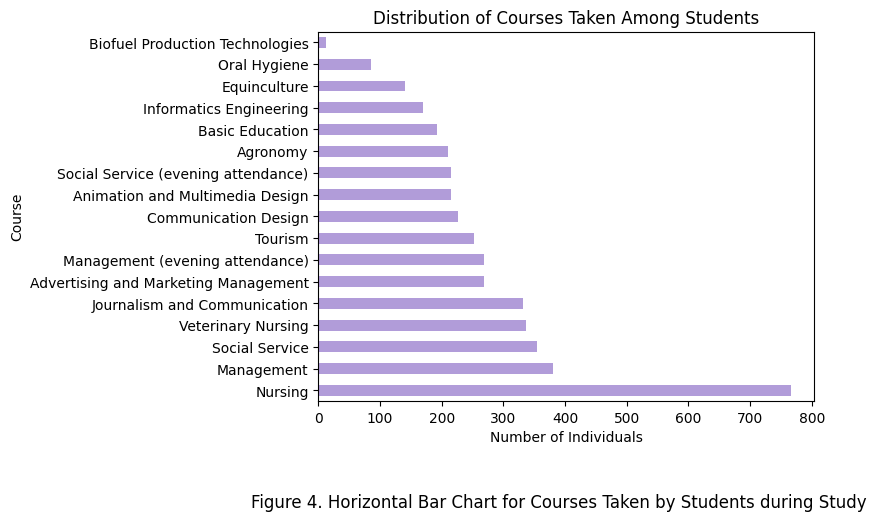

In [157]:
## Bar Chart for Course variable
course_mapping = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

X_copy = pd.DataFrame(X)

# Replace numerical values with labels
X_copy['Course'] = X_copy['Course'].map(course_mapping)

# Count occurrences of each education level
course_counts = X_copy['Course'].value_counts()

course_counts.plot(kind='barh', color='#B19CD9')
plt.title('Distribution of Courses Taken Among Students')
plt.xlabel('Number of Individuals')
plt.ylabel('Course')
plt.figtext(0.5, -0.1, 'Figure 4. Horizontal Bar Chart for Courses Taken by Students during Study', ha='center', va='center', fontsize=12, color='black')

plt.show()

In the horizontal bar chart above (Figure 4), we can see that the majority of students in this dataset were taking nursing classes and management classes during the period in which data was collected. This could show that these students are studying nursing and business, respectively, during college.

#### Data Analysis

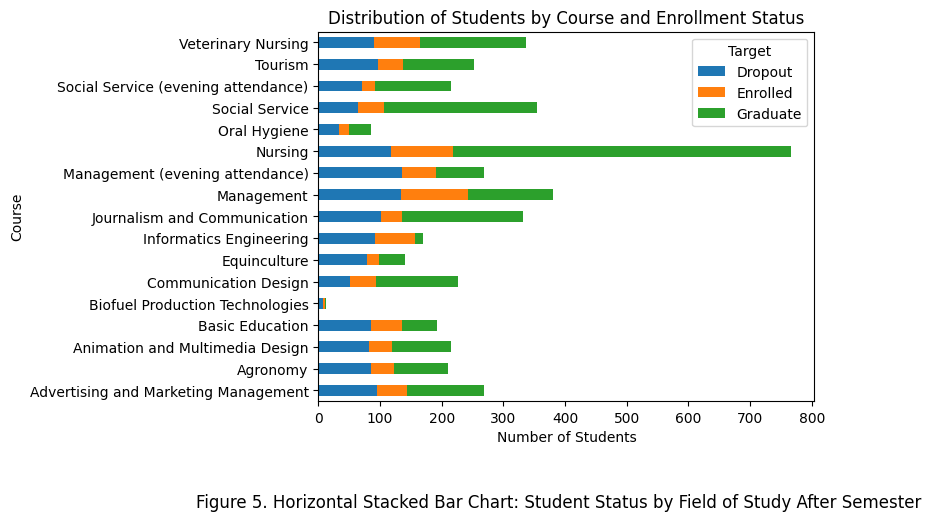

In [172]:
## Stacked Bar graph for Course and Target variables
df_col_merged['Course'] = df_col_merged['Course'].map(course_mapping)

pivot_table = df_col_merged.pivot_table(index='Course', columns='Target', aggfunc='size', fill_value=0)
pivot_table.plot(kind='barh', stacked=True)

# Add labels and title
plt.xlabel('Number of Students')
plt.ylabel('Course')
plt.title('Distribution of Students by Course and Enrollment Status')
plt.legend(title='Target')
plt.figtext(0.5, -0.1, "Figure 5. Horizontal Stacked Bar Chart: Student Status by Field of Study After Semester", ha='center', va='center', fontsize=12, color='black')

plt.show()

As shown in Figure 5, students are distributed across different statuses: those who have dropped out, those still enrolled, and those who have graduated by the end of the semester. Notably, there appears to be a higher dropout rate in STEM-related fields of study.

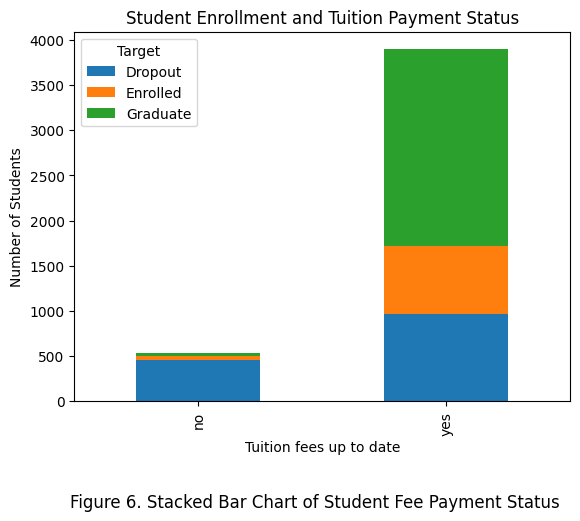

In [159]:
## Plot for Tuition fees up to date variable and Target variable
fees_mapping = {0: "no", 1: "yes"}

df_col_merged['Tuition fees up to date'] = df_col_merged['Tuition fees up to date'].map(fees_mapping)

pivot_table = df_col_merged.pivot_table(index='Tuition fees up to date', columns='Target', aggfunc='size', fill_value=0)
pivot_table.plot(kind='bar', stacked = True)

# Add labels and title
plt.xlabel('Tuition fees up to date')
plt.ylabel('Number of Students')
plt.title('Student Enrollment and Tuition Payment Status')
plt.legend(title='Target')
plt.figtext(0.5, -0.1, "Figure 6. Stacked Bar Chart of Student Fee Payment Status", ha='center', va='center', fontsize=12, color='black')

plt.show()

In Figure 6, we can see that there is a striking number of students who were unable to pay their tuition and are now not attending school. We can contrast this with the students who have paid their fees and have also graduated or are still enrolled. The majority of students who have not paid their tuition have dropped out, while the majority of students who have paid their tuition have either graduated or are still enrolled at their college.

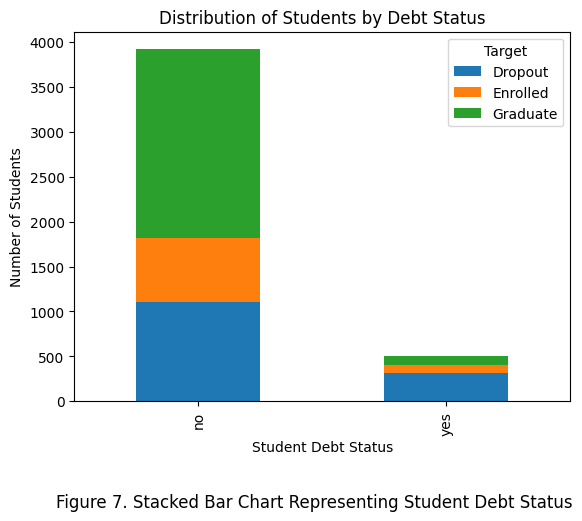

In [160]:
## Plot for Debtor variable and Target variable
debtor_mapping = {0: "no", 1: "yes"}

df_col_merged['Debtor'] = df_col_merged['Debtor'].map(displaced_mapping)

pivot_table = df_col_merged.pivot_table(index='Debtor', columns='Target', aggfunc='size', fill_value=0)
pivot_table.plot(kind='bar', stacked = True)

# Add labels and title
plt.xlabel('Student Debt Status')
plt.ylabel('Number of Students')
plt.title('Distribution of Students by Debt Status')
plt.legend(title='Target')
plt.figtext(0.5, -0.1, "Figure 7. Stacked Bar Chart Representing Student Debt Status", ha='center', va='center', fontsize=12, color='black')

plt.show()


In Figure 7, we observe that most students are not in debt. However, among those who do have debt, a significant portion has dropped out, suggesting that financial difficulties may contribute to the decision to not complete college.

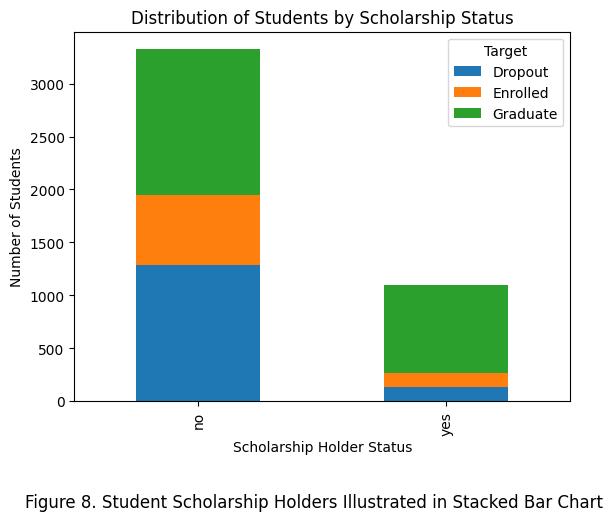

In [161]:
## Plot for Scholarship holder variable and Target variable
n_mapping = {0: "no", 1: "yes"}

df_col_merged['Scholarship holder'] = df_col_merged['Scholarship holder'].map(n_mapping)

pivot_table = df_col_merged.pivot_table(index='Scholarship holder', columns='Target', aggfunc='size', fill_value=0)
pivot_table.plot(kind='bar', stacked = True)

# Add labels and title
plt.xlabel('Scholarship Holder Status')
plt.ylabel('Number of Students')
plt.title('Distribution of Students by Scholarship Status')
plt.legend(title='Target')
plt.figtext(0.5, -0.1, "Figure 8. Student Scholarship Holders Illustrated in Stacked Bar Chart", ha='center', va='center', fontsize=12, color='black')

plt.show()

As shown in Figure 8, there are notable differences between students who hold a scholarship and those who do not. Among scholarship holders, most students have either graduated or are still enrolled in college. Conversely, a significant proportion of students without scholarships have dropped out. This disparity may indicate that financial support plays a crucial role in student retention and maintaining enrollment at college.

### Discussion


What my data analysis shows is how one factor may influence a student’s possibility of dropping out of college. First, I examined a few key demographic variables that showcase who exactly the student population is, such as what field of study they are interested in, their age, and marital status, shown in Figures 1, 2, 3 and 4. These variables give us detailed information about the college student population that was recorded throughout the dataset. Then, I started looking at any possible relationships between the variables listed in the dataset with the Target variable, a variable that consisted of three categories: Enrolled, Dropout and Graduate. Overall, there are a total of three potential factors that might explain the dropout rate within this population.

The first variable that I looked at was the classes each student took during the semester that this study was conducted in. The variable Course had a total of 17 categories, or in this case, field of study that the students were enrolled in. As shown in Figure 5, there are varying levels of students in each category in each individual area of study. For example, we can see that, of the approximately 400 students enrolled in management classes, about 150 students dropped out, about 250 students are still currently enrolled, and about 400 students have graduated by the end of the semester. These ratios are similar in most of the other areas of study, where roughly 30% of all students in their respective field of study drop out. It is unknown why these students drop out, either due to the curriculum of the field or the rigor that may be too much for them. Regardless, there is no indication that the area of study is heavily involved in student dropout rate since each field has roughly the same percentage.

Next, I started looking at variables that were finance related, such as scholarships, debt and tuition fees. First, I looked at the relationship between a student’s enrollment and whether or not they were able to pay their tuition and fees. By creating a stacked bar graph (Figure 6), I observed that, although a majority of students have paid their fees, a substantial number of students have not. From the group that has not, I observed that a large portion of the students have dropped out. This may be as a result of being unable to pay their fees on time. Another variable that I considered debt. It is unknown where the source of this debt comes from, or the amount of debt an individual is in, but researchers have recorded students and whether they had debt or not. As shown in Figure 7, although a large portion of students do not have debt, a significant portion do. In the “yes” bar, a substantial number of students who have dropped out are present, indicating that acquiring too much debt can put students at a disadvantage and force them to drop out. A final variable that I analyzed was called “Scholarship holder,” where researchers asked students if they currently hold a scholarship that could potentially pay for portions of their tuition and other expenses. Shown in Figure 8, the majority of students in this population did not hold a scholarship at the time this study was conducted. Of the ones that did, only a small portion dropped out, whereas a considerable portion of students who did drop out had no scholarship at all. This may indicate that scholarships are one way in reducing dropout rates in college student populations, as they provide an incentive and gracious opportunity for them to continue their studies and education.

The overall big picture here is that money is an important factor to consider when observing the reasoning behind dropout rates in college students. For many students, money is an important part of their lives, and attending college is known to be a costly investment. If students are not able to pay their tuition, whether it is due to lack of money management, scholarships, or other reasons, then students would be forced to either take out loans, which could put them in an even worse position than before, or unenroll in their institution. Factors such as debt status, scholarship status and tuition paid status are important in knowing if a student will stay enrolled or not in college. This data is useful because it provides evidence that programs for scholarships and government aid are important for students that come from low income families and need the money to help pay for college. It also provides insight as to how future research can be done to prevent student dropout rates from increasing and find methods that work in combating the problems associated with college dropouts.

### Reference

M.V.Martins, D. Tolledo, J. Machado, L. M.T. Baptista, V.Realinho. (2021) "Early prediction of student’s performance in higher education: a case study" Trends and Applications in Information Systems and Technologies, vol.1, in Advances in Intelligent Systems and Computing series. Springer. DOI: 10.1007/978-3-030-72657-7_16